## Quiz 3: KNN

1. Generate a sample using make_blobs from sklearn.datasets with n_samples = 200, center = 3, cluster_std = 1.0 and plot it using a scatter plot where different colours indicate different clusters (1 point)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=200, centers=3, random_state=0, cluster_std=1.0)

2. In the KNN lecture notes, it says that there are many methods to calculate the distance between points. So far we have studied euclidean distance, so in this quiz we would like you to explore other distance measurement methods. Please implement **at least one other distance measurement method** and include it in your KNN class which you have implemented in your KNN assignment. (3 points)

Note: Your class should allow users to choose their own distance measurement method, and should raise ValueError when undefined methods was given as input

Hint: https://machinelearningmastery.com/distance-measures-for-machine-learning/

In [ ]:
class KNN:
    def predict(self, X_train, X_test, y_train, k=3, method='euclidean'):
        self.method = method
        classes = len(np.unique(y_train))
        neighbors_ix = self.find_neighbors(X_train, X_test, k)
        pred = np.zeros(X_test.shape[0])
        prob = np.zeros((X_test.shape[0],classes))
        for ix, y in enumerate(y_train[neighbors_ix]):
            freq = np.bincount(y)
            while len(freq) < classes:
                freq = np.append(freq, 0)
            k_inc = k
            while np.sort(freq)[-1] == np.sort(freq)[-2]:
                k_inc += 1
                neighbors_ix_new = self.find_neighbors(X_train, X_test[ix].reshape(1,-1), k_inc).reshape(-1)
                freq = np.bincount(y_train[neighbors_ix_new])
                while len(freq) < classes:
                    freq = np.append(freq, 0)
            prob[ix] = freq/np.sum(freq)
            pred[ix] = self.get_most_common(y)
        return pred, prob

    def find_euclidean_distance(self, X_train, X_test):
        #create newaxis simply so that broadcast to all values
        dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
        sq_dist = dist ** 2

        #sum across feature dimension, thus axis = 2
        summed_dist = sq_dist.sum(axis=2)
        sq_dist = np.sqrt(summed_dist)
        return sq_dist
    
    def find_manhattan_distance(self, X_train, X_test):
        #create newaxis simply so that broadcast to all values
        dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
        ab_dist = abs(dist)
        summed_dist = ab_dist.sum(axis=2)
        return summed_dist

    def find_neighbors(self, X_train, X_test, k=3):
        if self.method == 'euclidean':
            dist = self.find_euclidean_distance(X_train, X_test)
        elif self.method == 'manhattan':
            dist = self.find_manhattan_distance(X_train, X_test)
        else:
            raise ValueError("The method does not match")
        #return the first k neighbors
        neighbors_ix = np.argsort(dist)[:, 0:k]
        return neighbors_ix

    def get_most_common(self, y):
        return np.bincount(y).argmax()

3. Perform cross validation to find the best value of k and perform classification using **all** the distance measurement methods (also raise ValueError) you have implemented. (3 points)

In [ ]:
def CV_K(X_train_val, y_train_val, K_max=5, cv=3, method='euclidean'):
    # Split train data and validation data
    m, n = X_train_val.shape
    idx = list(range(m))
    idx_List = []
    for i in range(cv):
        idx_List.append(idx[i*int(m/cv):(i+1)*int(m/cv)])
    # Predict and find accuracy
    acc = []
    K = []
    for i in range(1, K_max+1):
        acc_sum = 0
        for idx in idx_List:
            X_val = X_train_val[idx]
            y_val = y_train_val[idx]
            X_train = np.delete(X_train_val,idx, axis=0)
            y_train = np.delete(y_train_val,idx, axis=0)
            model = KNN()
            yhat, yhat_prob = model.predict(X_train, X_val, y_train, k=i, method=method)
            acc_sum += np.sum(yhat == y_val)/len(y_val)
        acc.append(acc_sum/cv)
        K.append(i)
    return acc, K

Best K: 7 Accuracy: 0.9565217391304349


<function matplotlib.pyplot.show(close=None, block=None)>

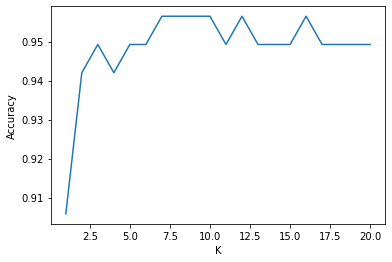

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
acc, K = CV_K(X_train, y_train, K_max=20, cv=3, method='euclidean')
idx = np.argmax(acc)
print("Best K:", K[idx], "Accuracy:",acc[idx])
plt.plot(K, acc)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show

4. **Justify and Discuss** your results i.e. distant measurement methods, value of k, etc. (2 points)

The distant measurement method is Manhattan Distance
Best K is 7 with 0.957 accuracy